In [93]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

## Вариант 3
$y=|x|, a=-3, b=3$

<img src="images/assigment1.jpg" width="700">

### 1. Формируем выборку

$m_x=\frac{a+b}{2}=0, \sigma_x=\sqrt{\frac{(b-a)^2}{12}}=\sqrt{3}$

In [94]:
def get_x(a, b):
    return a + (b - a) * np.random.uniform()

def get_y(x):
    return np.abs(x)

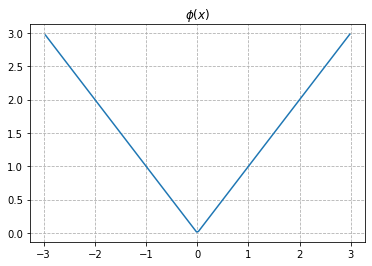

In [95]:
L, R = -3, 3
a, b = -3, 3
N = 250
#N = int(input())
x = sorted([get_x(a, b) for i in range(N)])
y = get_y(x)
plt.plot(x, y)
plt.title("$\phi(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 2. Вариационный ряд и эмпирическая функция распределения

In [96]:
unique, counts = np.unique(y, return_counts=True)
Y = dict(zip(unique, counts))
Y

{0.01552741861841156: 1,
 0.021946010995746335: 1,
 0.046742597503184324: 1,
 0.04900580153200185: 1,
 0.08755510202728001: 1,
 0.09549299657807175: 1,
 0.1063652590087818: 1,
 0.12080500364284275: 1,
 0.13567913172406598: 1,
 0.1759092814684422: 1,
 0.19525265322186858: 1,
 0.2126162999324417: 1,
 0.2204557357043644: 1,
 0.23406842705246156: 1,
 0.24745741362595286: 1,
 0.2532748774558389: 1,
 0.2628496349093137: 1,
 0.26903687112226216: 1,
 0.29513195418395766: 1,
 0.29953047459136517: 1,
 0.31908487078442915: 1,
 0.32330544302447084: 1,
 0.34813040405483076: 1,
 0.3689514211935121: 1,
 0.3799878283126539: 1,
 0.38231134250903454: 1,
 0.38427961639126096: 1,
 0.40330606025791305: 1,
 0.4057610747411391: 1,
 0.42393806034845083: 1,
 0.44386384249607325: 1,
 0.44592836023446125: 1,
 0.4522763099001095: 1,
 0.4547172795516685: 1,
 0.4787919216832801: 1,
 0.48760816623004644: 1,
 0.502840341452579: 1,
 0.5030660212804499: 1,
 0.5056374641637755: 1,
 0.5108376592752988: 1,
 0.520517374441

In [97]:
def F_y_emp(X, x0):
    count = 0
    for i in X:
        if i <= x0:
            count += 1
    return count / len(X)

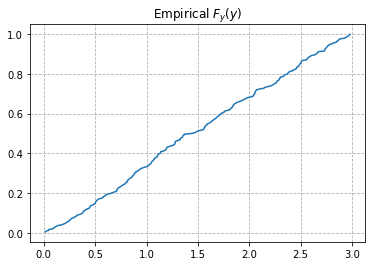

In [98]:
f_y_emp = [F_y_emp(Y, y) for y in Y.keys()]
plt.plot(list(Y.keys()), f_y_emp)
plt.title("Empirical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### 3. Теоритически находим функцию распределения

<img src="images/Lab1_3.jpg" width="450">

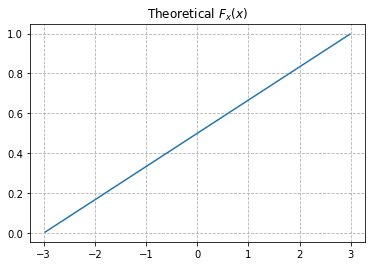

In [99]:
def F_x_ther(t):
    if t < -3:
        return 0
    elif t > 3:
        return 1
    else:
        return (t - a) / (b - a)  

plt.plot(x, [F_x_ther(x_0) for x_0 in x])
plt.title("Theoretical $F_x(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

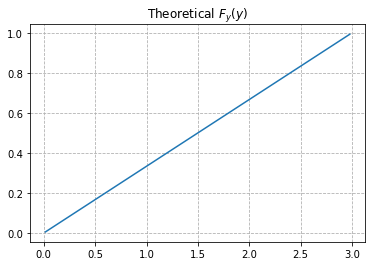

In [100]:
def F_y_ther(y):
    if y < 0:
        return 0
    else:
        return F_x_ther(y) - F_x_ther(-y)

f_y_ther = [F_y_ther(y0) for y0 in list(Y.keys())]
plt.plot(list(Y.keys()), f_y_ther)
plt.title("Theoretical $F_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### Сравниваем теоритческую и эмпирическую

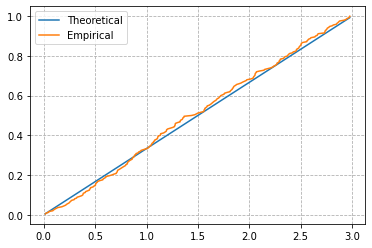

In [101]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(list(Y.keys()), f_y_emp, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

# lab2

<img src="images/assignment2.jpg" width="700">

## Задание 2

### 1. Гистрограмма равноинтервальным методом, полигон расределения и эмпирическая функция распредеделения

In [102]:
X = list(Y.keys())

In [103]:
if N > 100:
    M = int(4 * np.log10(N))
else:
    M = int(np.sqrt(N))

In [104]:
h = (X[-1] - X[0]) / M
A_i = [X[0] + i * h for i in range(M+1)]

In [105]:
a = A_i[:-1]
b = A_i[1:]
intervals = list(zip(a, b))
print("intervals")
intervals

intervals


[(0.01552741861841156, 0.34479328564026557),
 (0.34479328564026557, 0.6740591526621196),
 (0.6740591526621196, 1.0033250196839736),
 (1.0033250196839736, 1.3325908867058276),
 (1.3325908867058276, 1.6618567537276816),
 (1.6618567537276816, 1.9911226207495356),
 (1.9911226207495356, 2.32038848777139),
 (2.32038848777139, 2.6496543547932436),
 (2.6496543547932436, 2.9789202218150974)]

In [106]:
m_i = np.zeros(len(intervals))
current_interval = 0
for value in X:
    if intervals[current_interval][0] < value and value < intervals[current_interval][1]:
        m_i[current_interval] += 1
        continue
    if intervals[current_interval][0] == value or value == intervals[current_interval][1]:
        m_i[current_interval] += 0.5
        continue
    current_interval += 1
m_i[0] += 0.5
m_i[-1] += 0.5
print("m_i")
m_i

m_i


array([22., 27., 32., 35., 23., 26., 25., 28., 24.])

In [107]:
av_density = [round(value / len(X), 4) / h for value in m_i]
av_density

[0.2672612281252926,
 0.3280024163355864,
 0.38874360454588025,
 0.42518831747205654,
 0.27940946576735143,
 0.31585417869352767,
 0.3037059410514689,
 0.3401506539776452,
 0.2915577034094102]

In [108]:
interval_x = [intervals[0][0]]
interval_y = [0]
for i in range(len(intervals)):
    interval_x.append(intervals[i][0])
    interval_y.append(av_density[i])
    interval_x.append(intervals[i][1])
    interval_y.append(av_density[i])
interval_x.append(intervals[-1][1])
interval_y.append(0)

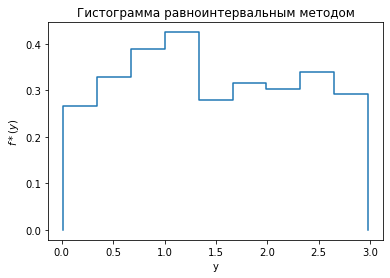

In [109]:
plt.plot(interval_x, interval_y)
plt.title("Гистограмма равноинтервальным методом")
plt.xlabel("y")
plt.ylabel("$f*(y)$")
plt.show()

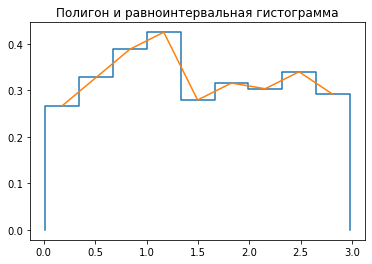

In [110]:
polygon_x = [(intervals[i][0] + intervals[i][1]) / 2 for i in range(len(intervals))]

plt.plot(interval_x, interval_y)
plt.plot(polygon_x, av_density)
plt.title("Полигон и равноинтервальная гистограмма")
plt.show()

In [111]:
empiric_func = []
sum = 0
for i in m_i:
    empiric_func.append(round(sum / N, 5))
    sum += i
empiric_func.append(1)
print(f'empirical function: {empiric_func}')

empirical function: [0.0, 0.088, 0.196, 0.324, 0.464, 0.556, 0.66, 0.76, 0.872, 1]


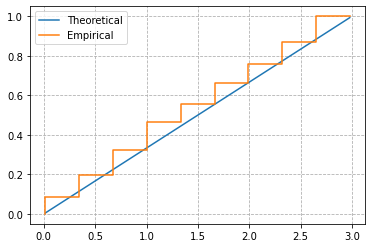

In [112]:
interval_x_F = [intervals[0][0]]
interval_y_F = [0]
for i in range(len(intervals)):
    interval_x_F.append(intervals[i][0])
    interval_y_F.append(empiric_func[i+1])
    interval_x_F.append(intervals[i][1])
    interval_y_F.append(empiric_func[i+1])

fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(interval_x_F, interval_y_F, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

In [113]:
pd.DataFrame(
    {
        'interval': intervals,
        'm_i': m_i,
        'h_i': h,
        'density': av_density
    }
)

,interval,m_i,h_i,density
0,"(0.01552741861841156, 0.34479328564026557)",22.0,0.329266,0.267261
1,"(0.34479328564026557, 0.6740591526621196)",27.0,0.329266,0.328002
2,"(0.6740591526621196, 1.0033250196839736)",32.0,0.329266,0.388744
3,"(1.0033250196839736, 1.3325908867058276)",35.0,0.329266,0.425188
4,"(1.3325908867058276, 1.6618567537276816)",23.0,0.329266,0.279409
5,"(1.6618567537276816, 1.9911226207495356)",26.0,0.329266,0.315854
6,"(1.9911226207495356, 2.32038848777139)",25.0,0.329266,0.303706
7,"(2.32038848777139, 2.6496543547932436)",28.0,0.329266,0.340151
8,"(2.6496543547932436, 2.9789202218150974)",24.0,0.329266,0.291558


### 2. Теоритическая плотность распределения

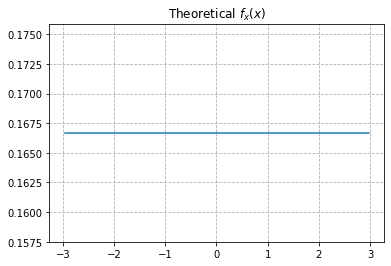

In [114]:
def F_x_ther(t):
    if abs(t) > 3:
        return 0
    else:
        return 1 / (R - L)  

plt.plot(x, [F_x_ther(x_0) for x_0 in x])
plt.title("Theoretical $f_x(x)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

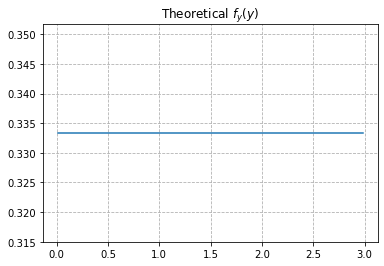

In [115]:
def F_y_ther(y):
    if y < 0:
        return 0
    else:
        return f_x_ther(y) + f_x_ther(-y)

f_y_theoretical = [F_y_ther(y0) for y0 in list(Y.keys())]
plt.plot(list(Y.keys()), f_y_theoretical)
plt.title("Theoretical $f_y(y)$")
plt.grid(True, which='both', linestyle='--')
plt.show()

### Сравниваем теоритческую и эмпирическую

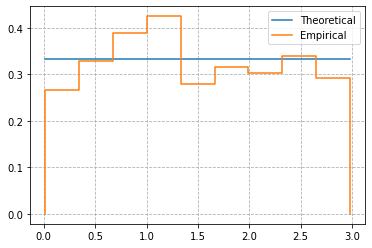

In [116]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_theoretical, label="Theoretical")
ax.plot(interval_x, interval_y, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

## Задание 3

### 1. Гистрограмма равновероятностным методом, полигон расределения и эмпирическая функция распредеделения

In [117]:
m = N // M

In [118]:
A = np.zeros(M)
B = np.zeros(M)
A[0] = X[0]
for i in range(1, M):
    B[i-1] = A[i] = (X[i*m] + X[i*m + 1]) / 2
B[-1] = X[-1]

In [119]:
intervals = list(zip(A, B))
intervals

[(0.01552741861841156, 0.40453356749952607),
 (0.40453356749952607, 0.7178143092222762),
 (0.7178143092222762, 0.9829409387942252),
 (0.9829409387942252, 1.2430631121926123),
 (1.2430631121926123, 1.5890605428665157),
 (1.5890605428665157, 1.871923790024052),
 (1.871923790024052, 2.2698886800337625),
 (2.2698886800337625, 2.5413097785957808),
 (2.5413097785957808, 2.9789202218150974)]

In [120]:
h_i = [interval[1] - interval[0] for interval in intervals]
h_i

[0.3890061488811145,
 0.3132807417227501,
 0.265126629571949,
 0.26012217339838717,
 0.3459974306739033,
 0.2828632471575363,
 0.3979648900097106,
 0.27142109856201824,
 0.43761044321931664]

In [121]:
f_i = [m/h_i[i]/N for i in range(M)]
f_i

[0.27763057296301563,
 0.3447387139282847,
 0.4073525174531417,
 0.4151895187904409,
 0.31214104622004596,
 0.38180994203128504,
 0.2713807240567497,
 0.39790569182786867,
 0.24679484156157072]

In [122]:
interval_x = [intervals[0][0]]
interval_y = [0]
for i in range(len(intervals)):
    interval_x.append(intervals[i][0])
    interval_y.append(f_i[i])
    interval_x.append(intervals[i][1])
    interval_y.append(f_i[i])
interval_x.append(intervals[-1][1])
interval_y.append(0)

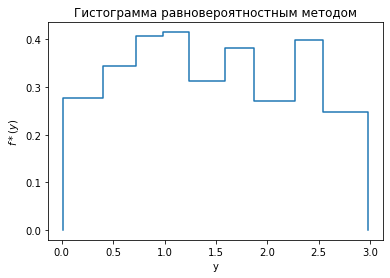

In [123]:
plt.plot(interval_x, interval_y)
plt.title("Гистограмма равновероятностным методом")
plt.xlabel("y")
plt.ylabel("$f*(y)$")
plt.show()

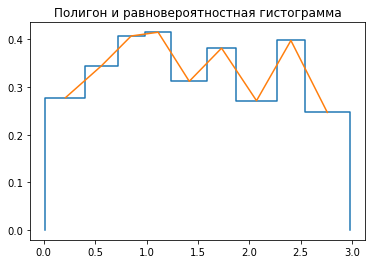

In [124]:
polygon_x = [(intervals[i][0] + intervals[i][1]) / 2 for i in range(len(intervals))]

plt.plot(interval_x, interval_y)
plt.plot(polygon_x, f_i)
plt.title("Полигон и равновероятностная гистограмма")
plt.show()

In [143]:
empiric_func = []
sum = 0
for i in f_i:
    empiric_func.append(round(sum/max(X), 5))
    sum += i
empiric_func.append(1)
print(f'empirical function: {empiric_func}')

empirical function: [0.0, 0.0932, 0.20892, 0.34567, 0.48505, 0.58983, 0.718, 0.8091, 0.94267, 1]


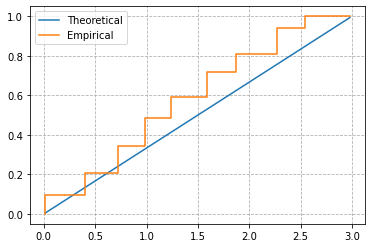

In [144]:
interval_x_F = [intervals[0][0]]
interval_y_F = [0]
for i in range(len(intervals)):
    interval_x_F.append(intervals[i][0])
    interval_y_F.append(empiric_func[i+1])
    interval_x_F.append(intervals[i][1])
    interval_y_F.append(empiric_func[i+1])

fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_ther, label="Theoretical")
ax.plot(interval_x_F, interval_y_F, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()

In [145]:
pd.DataFrame(
    {
        'interval': intervals,
        'm_i': m,
        'h_i': h_i,
        'f_i': f_i
    }
)

,interval,m_i,h_i,f_i
0,"(0.01552741861841156, 0.40453356749952607)",27,0.389006,0.277631
1,"(0.40453356749952607, 0.7178143092222762)",27,0.313281,0.344739
2,"(0.7178143092222762, 0.9829409387942252)",27,0.265127,0.407353
3,"(0.9829409387942252, 1.2430631121926123)",27,0.260122,0.415190
4,"(1.2430631121926123, 1.5890605428665157)",27,0.345997,0.312141
5,"(1.5890605428665157, 1.871923790024052)",27,0.282863,0.381810
6,"(1.871923790024052, 2.2698886800337625)",27,0.397965,0.271381
7,"(2.2698886800337625, 2.5413097785957808)",27,0.271421,0.397906
8,"(2.5413097785957808, 2.9789202218150974)",27,0.437610,0.246795


### 2. Сравнить полученные результаты

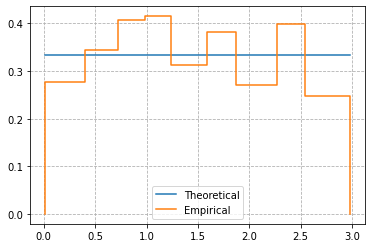

In [146]:
fig, ax = plt.subplots()

ax.plot(list(Y.keys()), f_y_theoretical, label="Theoretical")
ax.plot(interval_x, interval_y, label="Empirical")
ax.legend()
ax.grid(True, which='both', linestyle='--')
plt.show()